In [1]:
import os
os.chdir('..')

In [2]:
from matplotlib import pyplot as plt
from src import data as dt
from src import util
from src import experiments as ex
import yaml

In [3]:
color_map = plt.get_cmap('tab20').colors
image_set_variance = {
    'leuven': 'light',
    'bikes': 'blur',
    # 'trees': 'blur',
    # 'wall': 'viewpoint',
    'graf': 'viewpoint',
    # 'bark': 'zoom and rotation',
    'boat': 'zoom and rotation',
    'ubc': 'jpeg-compression'
}


with open(os.path.join('./', 'config.yml'), 'r') as ymlfile:
    cfg = yaml.load(ymlfile, Loader=yaml.FullLoader)
    cfg = cfg['default']

dataset_path = cfg['path']['dataset']
dataset = cfg['current_dataset']
pckl_path = cfg['path']['pckl']
pckl_name = ''.join([dataset, '_label.pckl'])
label_path = os.path.join(pckl_path, pckl_name)
labels = dt.load_data(label_path)

data_path = os.path.join(pckl_path, ''.join([dataset, '.pckl']))
image_set_name = 'leuven'
image_set_name_list = [key for key in image_set_variance.keys()]
image_set = util.get_image_set(data_path, image_set_name)

# image_nums = (1, 2)
# image1 = image_set[f'{image_set_name}_img{image_nums[0]}']
# image2 = image_set[f'{image_set_name}_img{image_nums[1]}']
# # label_name = f'{image_set_name}_img{image_nums[1]}'
# # label_homography = labels[label_name]
# detector_name = 'HarrisLaplace'
# descriptor_name = 'BRISK'
# colors = ['olive', 'red', 'cyan', 'blue', 'purple', 'green', 'grey', 'orange', 'indigo', 'black']
# # plt.style.use('ggplot')

# # plt.legend()
# # plt.show()

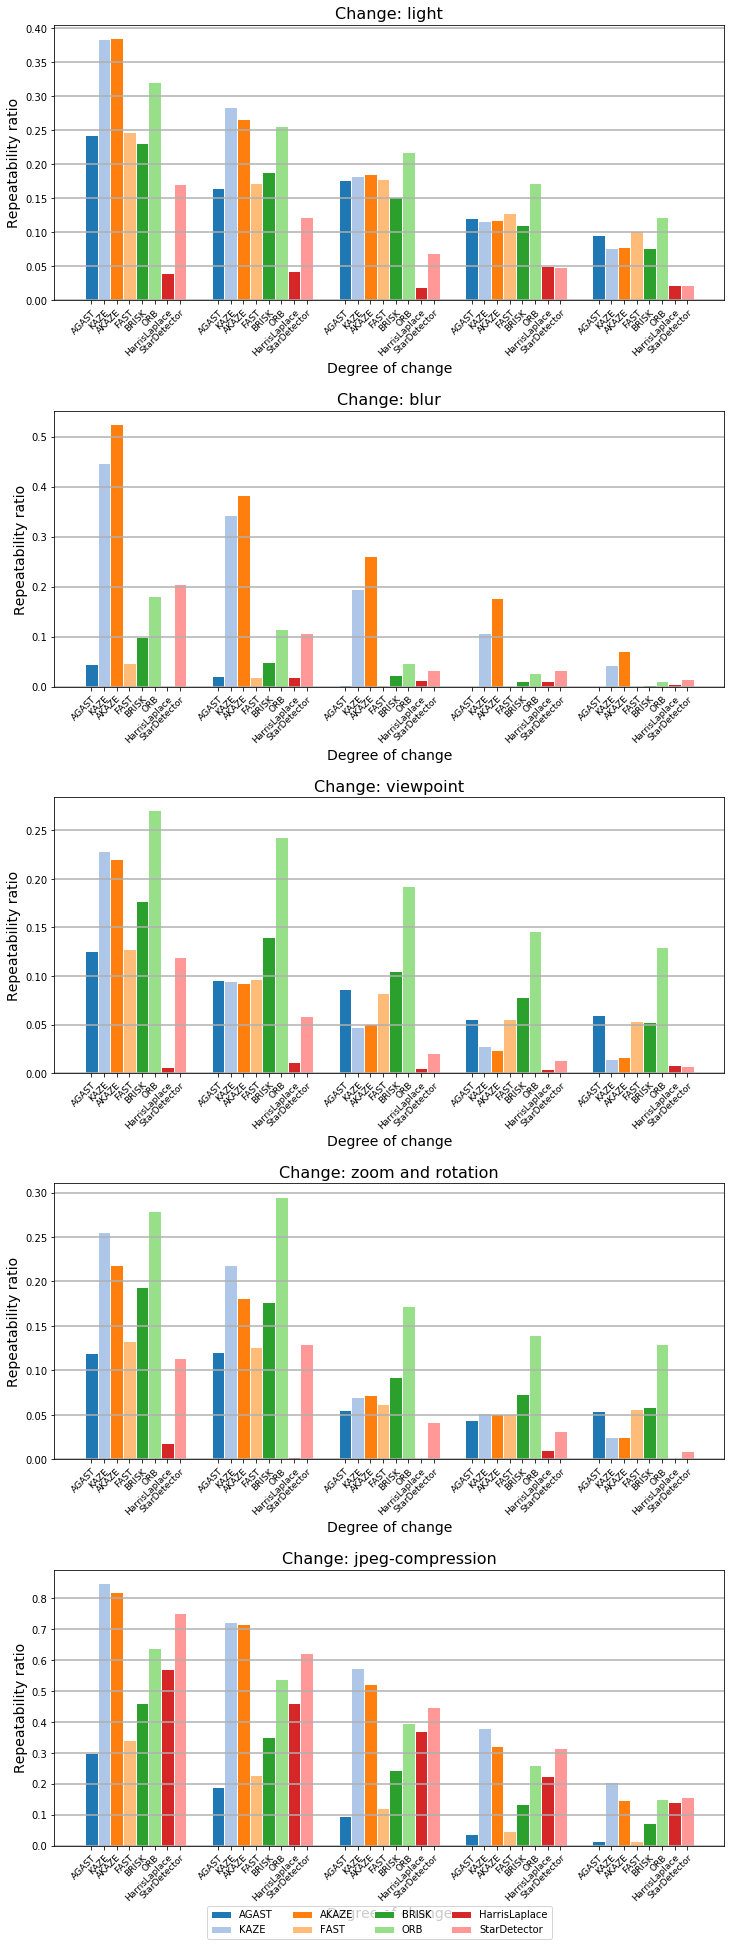

In [4]:
fig, axs = plt.subplots(len(image_set_name_list), 1, figsize=(12, len(image_set_name_list) * 6.5 + 1))

for i in range(len(image_set_name_list)):
    ex.exp_repeatability_plt(image_set_name_list[i], color_map, data_path, labels, axs[i])

    axs[i].set_xlabel(f'Degree of change', fontsize=14)
    axs[i].set_ylabel('Repeatability ratio', fontsize=14)
    axs[i].set_title(f'Change: {image_set_variance[image_set_name_list[i]]}', fontsize=16)

handles, labels = axs[0].get_legend_handles_labels()
# handles2, labels2 = axs2[0].get_legend_handles_labels()
# plt.legend(handles, labels, bbox_to_anchor=(0.75, -0.2), ncol=4)
fig.subplots_adjust(hspace=0.4)
# plt.show()

# plt.grid()
plt.show()